<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Chapter-2-Practice-Problems" data-toc-modified-id="Chapter-2-Practice-Problems-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Chapter 2 Practice Problems</a></span><ul class="toc-item"><li><span><a href="#Easy" data-toc-modified-id="Easy-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Easy</a></span></li><li><span><a href="#Medium" data-toc-modified-id="Medium-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Medium</a></span></li><li><span><a href="#Hard" data-toc-modified-id="Hard-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Hard</a></span></li></ul></li></ul></div>

In [3]:
# libraries 
library(rethinking)  
library(tidyverse)  
library(lubridate)  
# library(data.table)  
# detach("package:rethinking", unload=TRUE) 


# Chapter 2 Practice Problems

## Easy

##### 2E1. Which of the expressions below correspond to the statement: the probability of rain on Monday?

##### 2E2. Which of the following statements corresponds to the expression: Pr(Monday|rain)?

(1) The probability of rain on Monday.
(2) The probability of rain, given that it is Monday. 
(3) The probability that it is Monday, given that it is raining. <-
(4) The probability that it is Monday and that it is raining.

##### 2E3. Which of the expressions below correspond to the statement: the probability that it is Monday, given that it is raining?

(1) Pr(Monday|rain) <-
(2) Pr(rain|Monday)
(3) Pr(rain|Monday) Pr(Monday)
(4) Pr(rain|Monday) Pr(Monday)/ Pr(rain) <-
(5) Pr(Monday|rain) Pr(rain)/ Pr(Monday)

##### 2E4. The Bayesian statistician Bruno de Finetti (1906–1985) began his 1973 book on probability theory with the declaration: “PROBABILITY DOES NOT EXIST.” 

The capitals appeared in the original, so I imagine de Finetti wanted us to shout this statement. 

What he meant is that probability is a device for describing uncertainty from the perspective of an observer with limited knowledge; it has no objective reality. 

Discuss the globe tossing example from the chapter, in light of this statement. 

What does it mean to say “the probability of water is 0.7”?

This problem is merely a prompt for readers to explore intuitions about probability.<font color = 'blue'> The goal is to help understand statements like “the probability of water is 0.7” as statements about partial knowledge, not as statements about physical processes. </font> 

> The physics of the globe toss are deterministic, not “random.” But we are substantially ignorant of those physics when we toss the globe. So when someone states that a process is “random,” this can mean nothing more than ignorance of the details that would permit predicting the outcome.

As a consequence, probabilities change when our information (or a model’s information) changes. Frequencies, in contrast, are facts about particular empirical contexts. They do not depend upon our information (although our beliefs about frequencies do).

This gives a new meaning to words like “randomization,” because it makes clear that when we shuffle a deck of playing cards, what we have done is merely remove our knowledge of the card order. A card is “random” because we cannot guess it.

## Medium

##### 2M1. Recall the globe tossing model from the chapter. 

Here is the recipe for grid approximation:

(1) Define the grid. This means you decide how many points to use in estimating the
    posterior, and then you make a list of the parameter values on the grid.

(2) Compute the value of the prior at each parameter value on the grid.

(3) Compute the likelihood at each parameter value.

(4) Compute the unstandardized posterior at each parameter value, by multiplying the
    prior by the likelihood.

(5) Finally, standardize the posterior, by dividing each value by the sum of all values.

###### SR soln

In [4]:
# define grid
p_grid <- seq( from=0 , to=1 , length.out=20 )

In [5]:
# define prior
prior <- rep( 1 , 20 )

In [33]:
# compute likelihood at each value in grid
likelihood <- dbinom( 3 , size=3 , prob=p_grid )

In [34]:
# compute likelihood at each value in grid
likelihood <- dbinom( 3 , size=4 , prob=p_grid )

In [35]:
# compute likelihood at each value in grid
likelihood <- dbinom( 5 , size=7 , prob=p_grid )

In [36]:
# compute product of likelihood and prior
unstd.posterior <- likelihood * prior

In [21]:
# standardize the posterior, so it sums to 1
posterior <- unstd.posterior / sum(unstd.posterior)

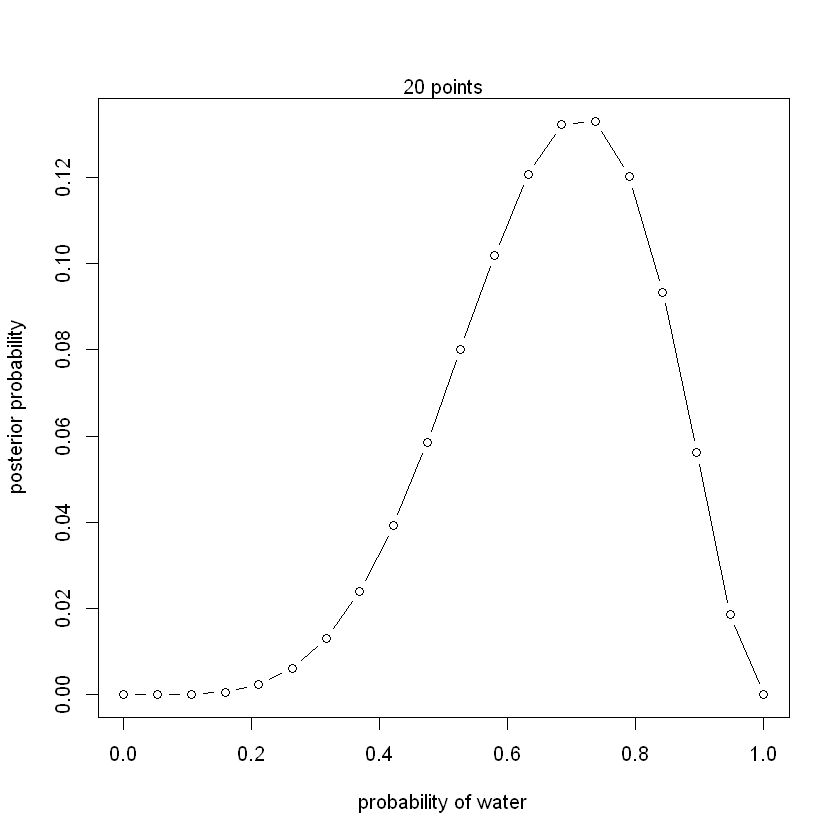

In [22]:
 plot( p_grid , posterior , type="b" ,
xlab="probability of water" , ylab="posterior probability" )
mtext( "20 points" )

###### Purr Version

In [2]:
# define grid
p_grid <- seq( from=0 , to=1 , length.out=20 )

In [3]:
# define prior
prior <- rep( 1 , 20 )

In [4]:
# likelihoods
waters <- list(3,3,5)
trials <- list(3,4,7)
ll <- map2(waters, trials, dbinom, prob=p_grid)

In [5]:
# compute product of likelihood and prior
unstd.posterior <- map(ll, function(ll) ll*prior)

In [6]:
# compute product of likelihood and prior
posterior <- map(unstd.posterior, function(unstd.posterior) unstd.posterior/sum(unstd.posterior))

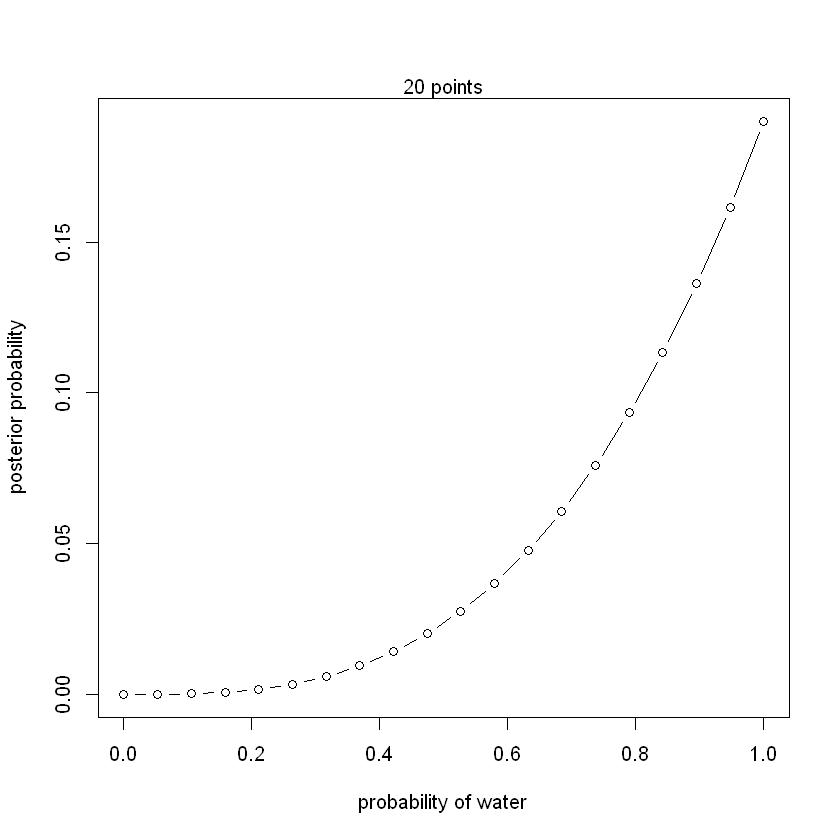

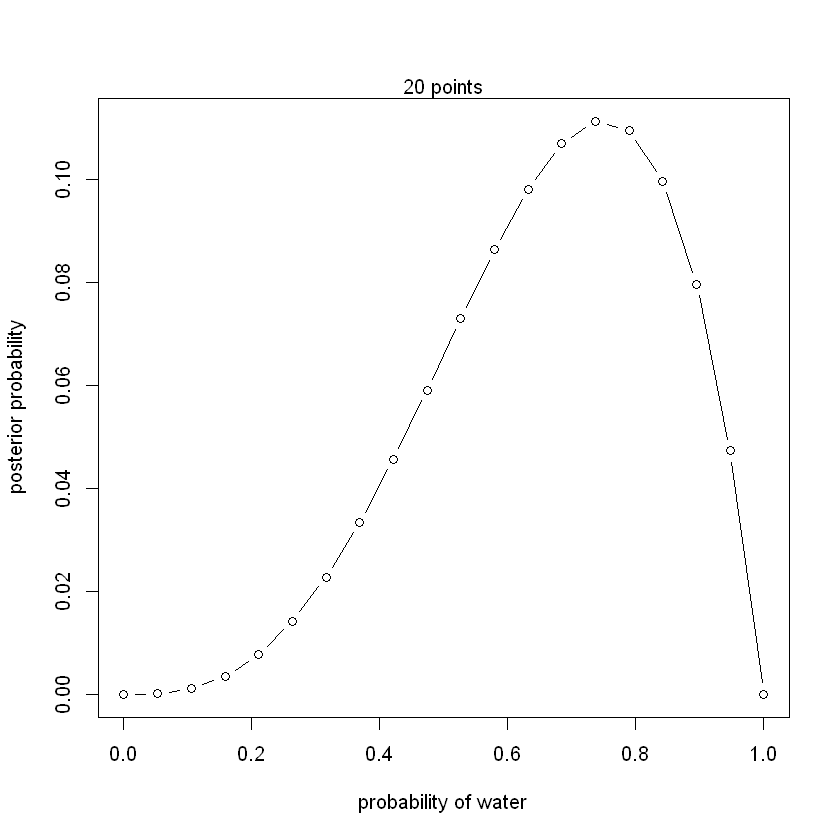

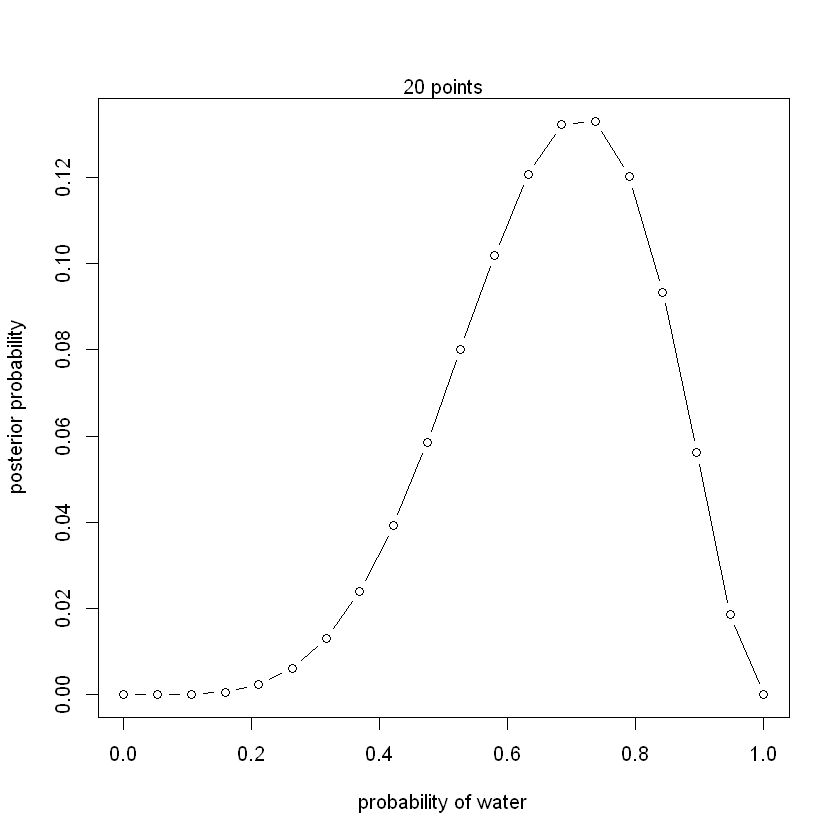

In [8]:
for (i in seq_along(posterior)){
    plot(p_grid, posterior[[i]], type="b",
        xlab="probability of water" , ylab="posterior probability" )
    mtext( "20 points" )
}

##### 2M2. Now assume a prior for p that is equal to zero when p < 0.5 and is a positive constant when p ≥ 0.5. 

Again compute and plot the grid approximate posterior distribution for each of the sets of
observations in the problem just above.

In [36]:
# define grid
p_grid <- seq( from=0 , to=1 , length.out=100 )
p_grid %>% round(2)

[1] 0.00 0.01 0.02 0.03 0.04 0.05 0.06 0.07 0.08 0.09 0.10 0.11 0.12 0.13 0.14
 [16] 0.15 0.16 0.17 0.18 0.19 0.20 0.21 0.22 0.23 0.24 0.25 0.26 0.27 0.28 0.29
 [31] 0.30 0.31 0.32 0.33 0.34 0.35 0.36 0.37 0.38 0.39 0.40 0.41 0.42 0.43 0.44
 [46] 0.45 0.46 0.47 0.48 0.49 0.51 0.52 0.53 0.54 0.55 0.56 0.57 0.58 0.59 0.60
 [61] 0.61 0.62 0.63 0.64 0.65 0.66 0.67 0.68 0.69 0.70 0.71 0.72 0.73 0.74 0.75
 [76] 0.76 0.77 0.78 0.79 0.80 0.81 0.82 0.83 0.84 0.85 0.86 0.87 0.88 0.89 0.90
 [91] 0.91 0.92 0.93 0.94 0.95 0.96 0.97 0.98 0.99 1.00

In [37]:
# define prior
# (prior <- as.numeric(p_grid > 0.5))
(prior <- ifelse( p_grid < 0.5 , 0 , 1 ))

[1] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 [38] 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 [75] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1

In [39]:
# likelihoods
waters <- list(3,3,5)
trials <- list(3,4,7)
ll <- map2(waters, trials, dbinom, prob=p_grid)

In [40]:
# compute product of likelihood and prior
unstd.posterior <- map(ll, function(ll) ll*prior)

In [41]:
# compute product of likelihood and prior
posterior <- map(unstd.posterior, function(unstd.posterior) unstd.posterior/sum(unstd.posterior))

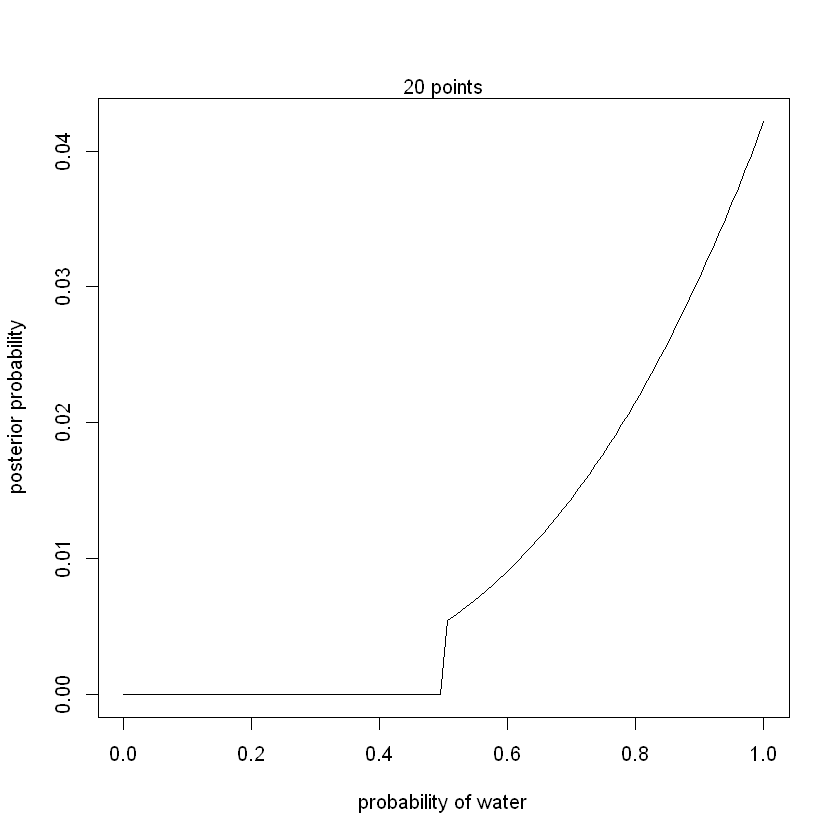

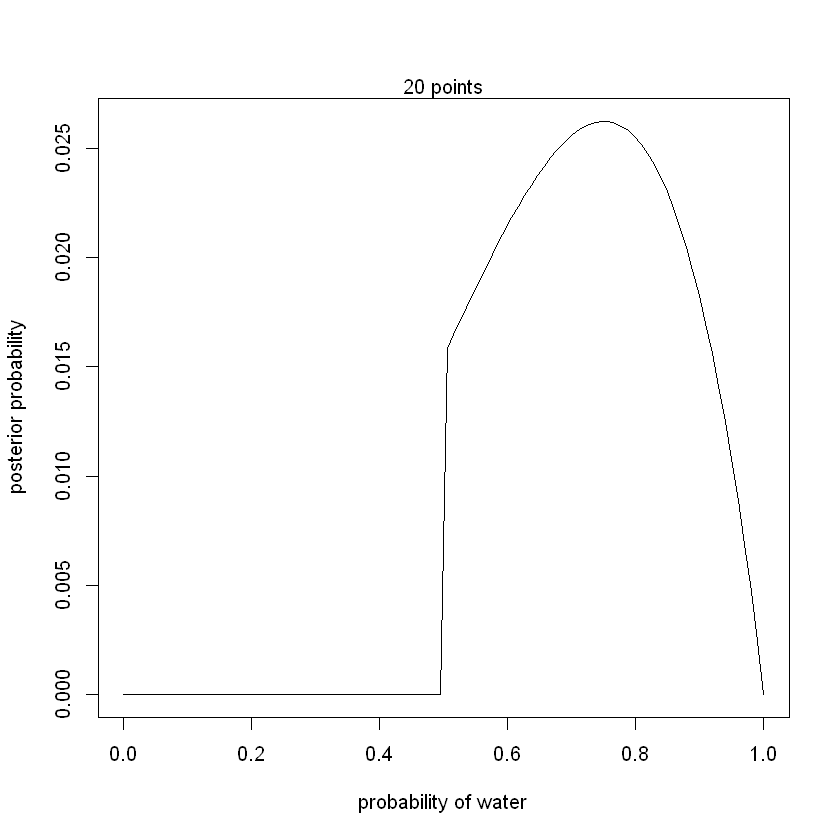

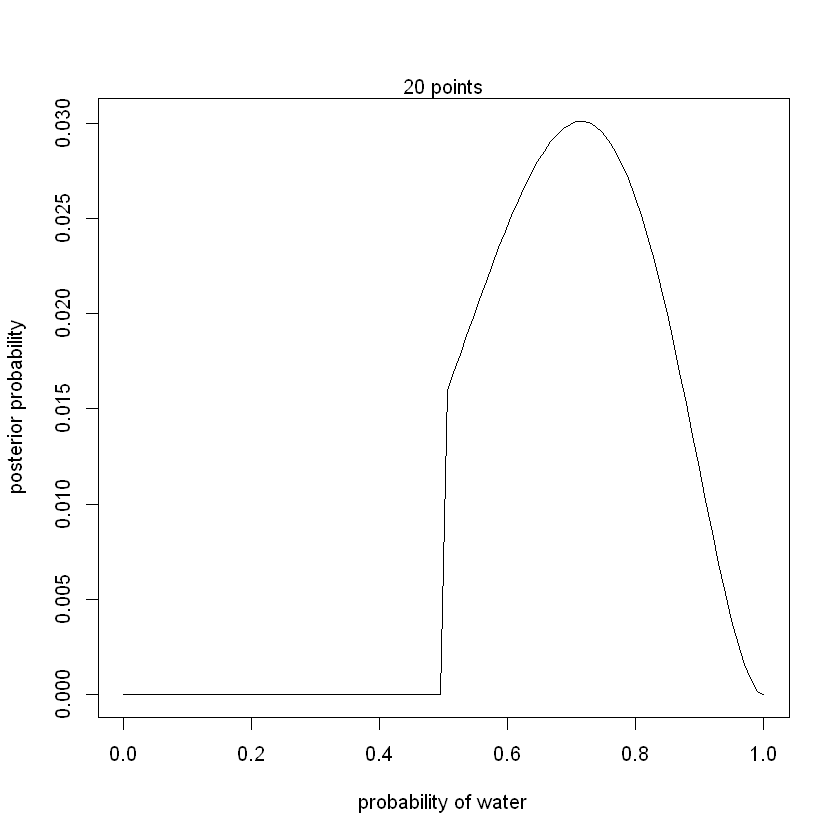

In [43]:
for (i in seq_along(posterior)){
    plot(p_grid, posterior[[i]], type="l",
        xlab="probability of water" , ylab="posterior probability" )
    mtext( "20 points" )
}

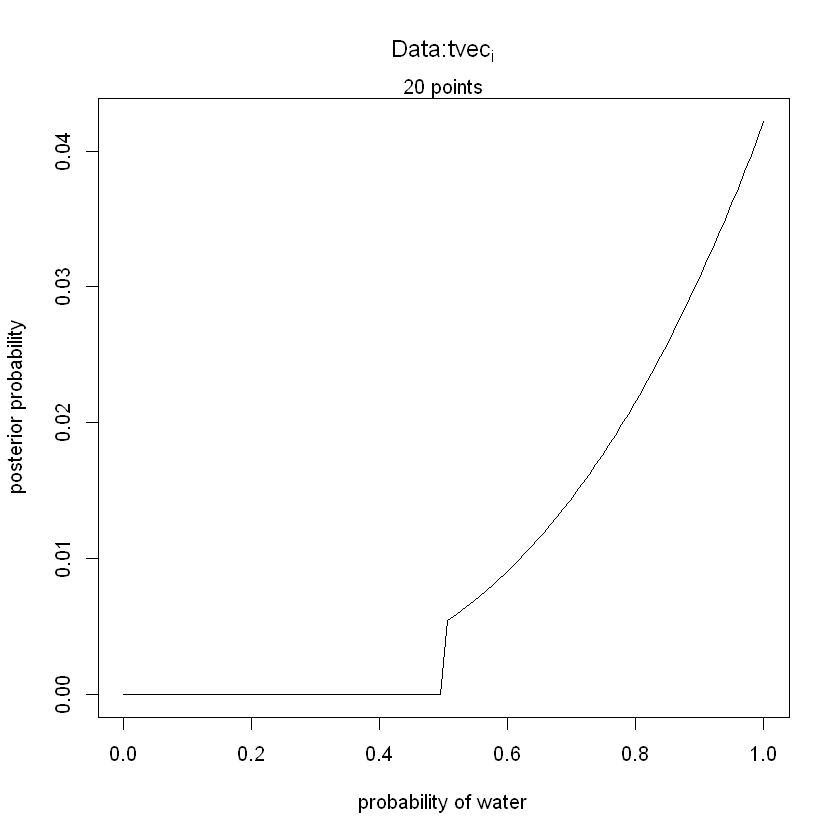

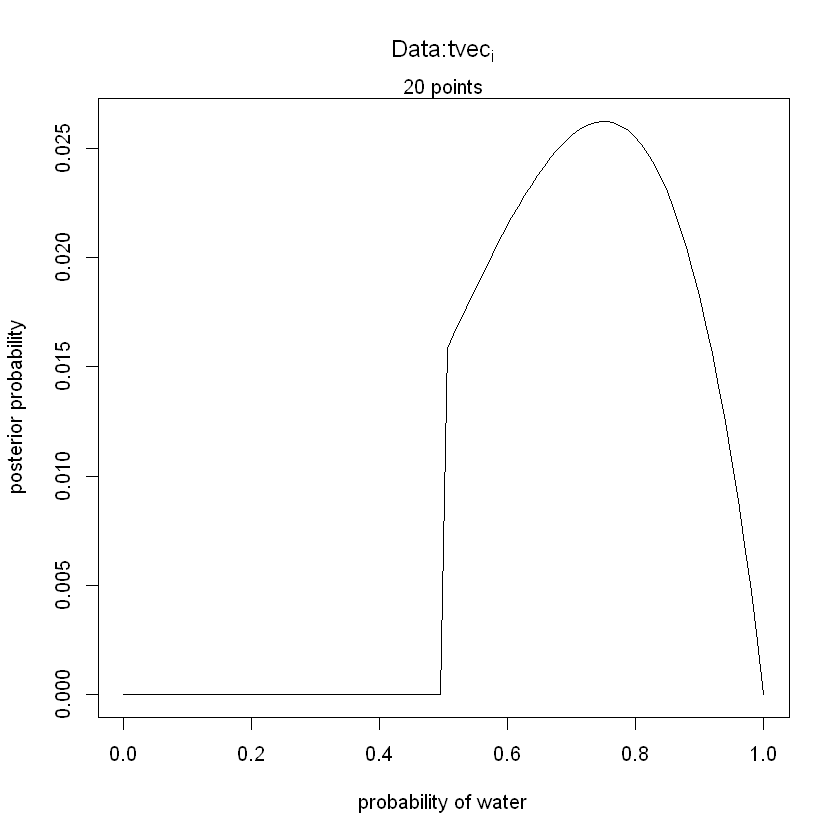

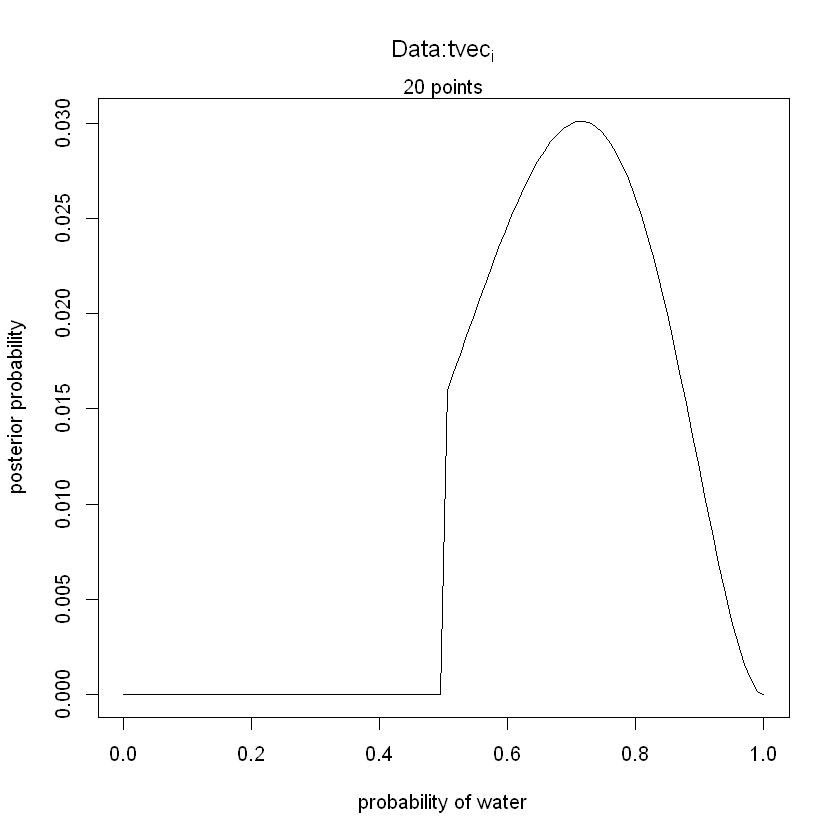

In [49]:
tvec <- c("Treatment", "Time Dummy", "test")

for (i in seq_along(posterior)){
    plot(p_grid, posterior[[i]], type="l",
        xlab="probability of water" , ylab="posterior probability",
        main=substitute(paste('Data:', list(a=tvec[i]))))
    mtext( "20 points" )
}

In [ ]:
tvec <- c("Treatment", "Time Dummy")

par(mfrow=c(2,1))
for(i in 1:2){
    plot(density(beta[,i]), 
         main=substitute(paste('Density of ', beta[a]), list(a=tvec[i])))
    }

##### 2M3. Suppose there are two globes, one for Earth and one for Mars. 

<font color = 'purple'>The Earth globe is 70% covered in water. The Mars globe is 100% land. 

Further suppose that one of these globes—you don’t know which—was tossed in the air and produced a “land” observation. 
<br><br>
Assume that each globe was equally likely to be tossed. 

Show that the posterior probability that the globe was the Earth, conditional on seeing “land” (Pr(Earth|land)), is 0.23. </font>

See C2.4 Pg 36

All I’ve done is reverse which probability is conditional, on the right-hand side. It is still a true definition. It’s like saying that the probability of rain and cold on the same day is equal to the probability that it’s cold, when it’s raining, times the probability of rain. 

In [47]:
# P(Earth|land)P(land) = P(land|Earth)P(Earth)

# P(Earth|land) = P(land|Earth)P(Earth)/P(land)
(0.3*0.5)/(0.65)

[1] 0.2307692

And there’s the answer, Pr(Earth|land) ≈ 0.23. 

<font color = 'blue'>You can think of this posterior probability as an updated prior</font>, of course. 

<font color = 'blue'>The prior probability was 0.5. Since there is more land coverage on Mars than on Earth, the posterior probability after observing land is smaller than the prior</font>.

##### 2M4. Suppose you have a deck with only three cards. 

<font color = 'purple'>

* Each card has two sides, and each side is either black or white. 
    
    * One card has two black sides. 
    
    * The second card has one black and one white side. 
    
    * The third card has two white sides. 

    
* Now suppose all three cards are placed in a bag and shuffled. 
    
    
* Someone reaches into the bag and pulls out a card and places it flat on a table. 
    
    * A black side is shown facing up, but you don’t know the color of the side facing down. 
    
<b>Show that the probability that the other side is also black is 2/3</b>. 
    
Use the counting method (Section 2 of the chapter) to approach this problem. This means counting up the ways that each card could produce the observed data (a black side facing up on the table). 


</font>

Third card (two white sides) isn't possible, therefore either card 1 or 2.

Card 1 has 2 ways of producing the black side facing up.
Card 2 only has 1 way of producing the black side facing up.

Now in total, there are 3 ways to see a black side up. 2 of those ways come from the B/B card. The other comes from the B/W card. So 2 out of 3 ways are consistent with the other side of the card being black.

Leaves 2/3 probability that the other side is also black.



###### SR Soln

Label the three cards as (1) B/B, (2) B/W, and (3) W/W. Having observed a black (B) side face up on the table, the question is: How many ways could the other side also be black?

<font color = 'blue'><b>First, count up all the ways each card could produce the observed black side</b></font>. 

* The first card is B/B, and so there are 2 ways is could produce a black side face up on the table. 
* The second card is B/W, so there is only 1 way it could show a black side up. 
* The final card is W/W, so it has zero ways to produce a black side up.

Now in total, there are 3 ways to see a black side up. 2 of those ways come from the B/B card. The other comes from the B/W card. So 2 out of 3 ways are consistent with the other side of the card being black. The answer is 2/3.

##### 2M5. Now suppose there are four cards: B/B, B/W, W/W, and another B/B. 

Again suppose a card is drawn from the bag and a black side appears face up. Again calculate the probability that the other side is black.

With the extra B/B card, there are now 5 ways to see a black card face up: 2 from the first B/B
card, 1 from the B/W card, and 2 more from the other B/B card. 

4 of these ways are consistent with a B/B card, so the probability is now 4/5 that the other side of the card is also black.

##### 2M6. Imagine that black ink is heavy, and so cards with black sides are heavier than cards with white sides. 

* As a result, it’s less likely that a card with black sides is pulled from the bag. 

So again assume there are three cards: B/B, B/W, and W/W. 

* After experimenting a number of times, you conclude that for every way to pull the B/B card from the bag, there are 2 ways to pull the B/W card and 3 ways to pull the W/W card. 

Again suppose that a card is pulled and a black side appears face up. 

* Show that the probability the other side is black is now 0.5. Use the counting method, as before.

This problem introduces uneven numbers of ways to draw each card from the bag. So while in the two previous problems we could treat each card as equally likely, prior to the observation, now we need to employ the prior odds explicitly.

* There are still 2 ways for B/B to produce a black side up, 1 way for B/W, and zero ways for W/W. 


* But now there is 1 way to get the B/B card, 2 ways to get the B/W card, and 3 ways to get the W/W card. So there are, in total, 1 × 2 = 2 ways for the B/B card to produce a black side up and 2 × 1 = 2 ways for the B/W card to produce a black side up. 

<font color = 'blue'>This means there are 4 ways total to see a black side up, and 2 of these are from the B/B card. 2/4 ways means probability 0.5.</font>

##### 2M7. Assume again the original card problem, with a single card showing a black side face up. 

Before looking at the other side, we draw another card from the bag and lay it face up on the table. The face that is shown on the new card is white. 

Show that the probability that the first card, the one showing a black side, has black on its other side is now 0.75. Use the counting method, if you can. 

Hint: Treat this like the sequence of globe tosses, counting all the ways to see each observation, for each possible first card.


b1/b2 w/b
b1/b2 w1/w2 # duplicate for the otherside 
b1/b2 w2/w1

b2/b1 w/b
b2/b1 w1/w2
b2/b1 w2/w1

b/w w1/w2
b/w w2/w1


6/8 possible first cards will have black on the other side = 1/4 = 0.75

 


The observation is now the sequence: black side up then white side up. We’re still interested in
the probability the other side of the first card is black. Let’s take each possible card in turn.
First the B/B card. There are 2 ways for it to produce the first observation, the black side up. This
leaves the B/W card and W/W card to produce the next observation. Each card is equally likely (has
same number of ways to get drawn from the bag). But the B/W card has only 1 way to produce a
white side up, while the W/W card has 2 ways. So 3 ways in total to get the second card to show white
side up. All together, assuming the first card is B/B, there are 2 × 3 = 6 ways to see the BW sequence
of sides up.

Now consider the B/W card being drawn first. There is 1 way for it to show black side up. This
leaves the B/B and W/W cards to produce the second side up. B/B cannot show white up, so zero
ways there. W/W has 2 ways to show white up. All together, that’s 1 × 2 = 2 ways to see the sequence
BW, when the first card is B/W.

The final card, W/W, cannot produce the sequence when drawn first. So zero ways.
Now let’s bring it all together. Among all three cards, there are 6 + 2 = 8 ways to produce the
sequence BW. 6 of these are from the B/B being drawn first. So that’s 6/8 = 0.75 probability that the
first card is B/B.

## Hard

##### 2H1. Suppose there are two species of panda bear. 

Both are equally common in the wild and live
in the same places. They look exactly alike and eat the same food, and there is yet no genetic assay
capable of telling them apart. 

They differ however in their family sizes. 

* Species A gives birth to twins 10% of the time, otherwise birthing a single infant. 

* Species B births twins 20% of the time, otherwise birthing singleton infants.

Assume these numbers are known with certainty, from many years of field
research.


Now suppose you are managing a captive panda breeding program. <font color = 'purple'>You have a new female panda
of unknown species, and she has just given birth to twins </font>. What is the probability that her next birth
will also be twins?

###### <b><font color = 'grey'>Rough</font></b>

In [ ]:
PrA <- 0.5
PrB <- 0.5

pr

###### <b><font color = 'grey'>McElreath Soln</font></b>

2H1. To solve this problem, realize first that it is asking for a conditional probability:

$Pr(\text{twins}_2|\text{twins}_1)$

the probability the second birth is twins, conditional on the first birth being twins. 

Remember the
definition of conditional probability:

$Pr(\text{twins}_2|\text{twins}_1) = \frac{Pr(\text{twins}_2, \text{twins}_1)}{Pr(\text{twins})}$

So our job is to define 
* Pr(twins1, twins2), the joint probability that both births are twins, and 
* Pr(twins), the unconditioned probability of twins.

<font color = 'purple'><b>Pr(twins) is easier, so let’s do that one first</b>. 

</font> <font color = 'blue'>The “unconditioned” probability just means that we have to average over the possibilities.</font> In this case, that means the species have to averaged over. 

The problem implies that both species are equally common, so there’s a half chance that any given panda
is of either species. This gives us:

A little arithmetic tells us that Pr(twins) = 0.15.

<b><font color = 'purple'>Now for Pr(twins1, twins2). </font></b> 
* The probability that a female from species A has two sets of twins is 0.1 × 0.1 = 0.01. 
* The corresponding probability for species B is 0.2 × 0.2 = 0.04. 

Averaging over species identity:


<b><font color = 'purple'>Finally, we combine these probabilities to get the answer: </font></b>


$Pr(\text{twins}_2|\text{twins}_1) = \frac{Pr(\text{twins}_2, \text{twins}_1)}{Pr(\text{twins})}$

<font color = 'blue'>Note that this is higher than Pr(twins)</font>. 

* This is because the first set of twins provides some information about which species we have, and this information was automatically used in the calculation.


##### 2H2. Recall all the facts from the problem above. 

Now compute the probability that the panda we have is from species A, <font color = 'purple'>assuming we have observed only the first birth and that it was twins </font>.

###### <font color = 'grey'>My soln</font>

Pr(A,twins1) = Pr(twins1) * Pr(A|twins1)
Pr(A|twins1) = Pr(A,twins1)/Pr(twins1)

Pr(twins1) = 1/2 * Pr(Twins|Species A) + 1/2 * Pr(Twins|Species B)
Pr(twins1) = (0.5)(0.1) + (0.5)(0.2) = 0.15

Pr(A|twins1) = Pr(A,twins1)/Pr(twins1)
Pr(A|twins1) = 0.05/0.15 = 1/3

<img src='pics/HR_strings42.png' alt='Drawing' style='width:425pt'/>

##### 2H3. Continuing on from the previous problem, suppose the same panda mother has a second birth and that it is not twins, but a singleton infant. 

Compute the posterior probability that this panda is species A
* i.e., find Pr(A|no_twins2)

###### <b><font color = 'grey'>McElreath </font></b>

<b><font color = 'purple'>The easiest is perhaps to recall that Bayes’ theorem accumulates evidence, using Bayesian updating.  </font></b>

<font color = 'purple'>So we can take the posterior probabilities from the previous problem and use them as prior probabilities in this problem </font>. 

* This implies Pr(A) = 1/3. 


* Now we can ignore the first observation, the twins, and concern ourselves with only the latest observation, the singleton birth. 


* The previous observation is embodied in the prior, so there’s no need to account for it again.

<b><font color = 'purple'>The formula is: </font></b>

$Pr(A|singleton) = \frac{Pr(singleton|A)Pr(A)}{Pr(singleton)}$

We already have the prior, Pr(A). The other pieces are straightforward:

Pr(singleton|A) = 1 − 0.1 = 0.9

Pr(singleton) = Pr(singleton|A) Pr(A) + Pr(singleton|B) Pr(B)

Pr(singleton) = (0.9)(1/3) + (0.8)(2/3) = 5/6

<b><font color = 'purple'>Combining everything, we get: </font></b>

$
\begin{align*} 
Pr(A|singleton) &= \frac{Pr(singleton|A)Pr(A)}{Pr(singleton)}\\
\\
Pr(A|singleton) &= \frac{0.9*1/3}{5/6} = 9/25 = 0.36
\end{align*} 
$



This is a modest increase in posterior probability of species A, an increase from about 0.33 to 0.36.

<b><font color = 'purple'>The other way to proceed is to go back to the original prior, Pr(A) = 0.5, before observed any births </font></b>. 

* Then you can treat both observations (twins, singleton) as data and update the original prior. 

I’m going to start abbreviating 
* “twins” as T and 
* “singleton” as S. 
    
The formula:

$Pr(A|T,S) = \frac{Pr(T,S|A)Pr(A)}{Pr(T,S)}$

Let’s start with the average likelihood, Pr(T, S), because it will force us to define the likelihoods anyway.

$Pr(T, S) = Pr(T, S|A) Pr(A) + Pr(T, S|B) Pr(B)$

I’ll go slowly through this, so I don’t lose anyone along the way. The first likelihood is just the probability a species A mother has twins and then a singleton:

$Pr(T, S|A) = (0.1)(0.9) = 0.09$

And the second likelihood is similar, but for species B:

$Pr(T, S|B) = (0.2)(0.8) = 0.16$

The priors are both 0.5, so all together:

$Pr(T, S) = (0.09)(0.5) + (0.16)(0.5) = 1/8 = 0.125$

We already have the likelihood needed for the numerator, so we can go to the final answer now:

$P(A|T,S) = \frac{(0.09)(0.5)}{0.125} = 0.36$

Unsurprisingly, the same answer we got the other way.

##### 2H4. A common boast of Bayesian statisticians is that Bayesian inference makes it easy to use all of the data, even if the data are of different types.

So suppose now that a veterinarian comes along who has a new genetic test that she claims can identify the species of our mother panda. But the test, like all tests, is imperfect. This is the information you have about the test:

* The probability it correctly identifies a species A panda is 0.8. 
* The probability it correctly identifies a species B panda is 0.65.

The vet administers the test to your panda and tells you that the test is positive for species A. 

* First ignore your previous information from the births and compute the posterior probability that your panda is species A. 

* Then redo your calculation, now using the birth data as well.

In [ ]:
# First ignore your previous information from the births and compute 
# the posterior probability that your panda is species A.

Pr(A|test_A) = Pr(A, test_A)/Pr(test_A)

Pr(A, test_A) = Pr(A)P(test_A|A)
Pr(A, test_A) = (0.5)*(0.80) = 0.4

Pr(test_A) = Pr(A)Pr(test_A|A) + Pr(B)Pr(test_A|B)
Pr(test_A) = 0.5*0.8 + 0.5*0.35 = 0.575

Pr(A|test_A) = 0.4/0.575 = 0.695652173913044

In [ ]:
# rough
Pr(A, test_A) = P(A)P(test_A|A)
Pr(A, test_A) = P(test_A)P(A|test_A)

In [ ]:
Pr(A|T,S) = Pr(A,T,S)/Pr(T,S)
Pr(A|T,S) = Pr(A)Pr(T,S|A)/Pr(T,S)
Pr(A|T,S) = (0.5*0.09)/0.125 = 0.36

# rough
Pr(T,S|A) = 0.10*0.9 = 0.09
Pr(T,S)   = 0.5*(0.09) + 0.5*(0.2)*(0.8) = 0.125
Pr(A,T,S) = Pr(A)Pr(T,S|A)
Pr(A,T,S) = Pr(T,S)Pr(A|T,S)

